# Лабораторная работа 3. Статистические гипотезы.

## Reading data and creating table of interval variational series (аналогично первой лабораторной работе)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
path_to_data = "data.xlsx"
df = pd.read_excel(path_to_data)
df.head()
writing_score = df['writing score'].copy()
reading_score = df['reading score'].copy()

writing_score.sort_values(inplace=True)
writing_score.reset_index(inplace=True, drop=True)
reading_score.sort_values(inplace=True)
reading_score.reset_index(inplace=True, drop=True)

writing_min = min(writing_score.min(), reading_score.min())
writing_max = max(writing_score.max(), reading_score.max())
writing_elements_count = writing_score.count()
writing_range = writing_max - writing_min 
writing_intervals_count = 15
writing_len_interval = writing_range / writing_intervals_count
writing_a = [writing_min + i*writing_len_interval for i in range(writing_intervals_count + 1)]
writing_indicates = writing_score.groupby(pd.cut(writing_score, writing_a, include_lowest=True)).count()
writing_indicates.name = 'indicates'
writing_frequency = writing_indicates / writing_elements_count
writing_frequency.name = 'frequency'
writing_hist = writing_frequency / writing_len_interval
writing_hist.name = "hist"
writing_points = [(writing_a[i] + writing_a[i + 1]) / 2 for i in range(writing_intervals_count)]
writing_F = writing_frequency.cumsum()
writing_F = pd.Series(index=writing_points, data=writing_F)
writing_F.name = 'F'
expect_writing_score = writing_points * writing_frequency
expect_writing_score.name = "expect"
expect_square_writing_score = (writing_points * writing_frequency) * writing_points
expect_square_writing_score.name = 'expect_square'

reading_min = min(writing_score.min(), reading_score.min())
reading_max = max(writing_score.max(), reading_score.max())
reading_elements_count = reading_score.count()
reading_range = reading_max - reading_min 
reading_intervals_count = 15
reading_len_interval = reading_range / reading_intervals_count
reading_a = [reading_min + i*reading_len_interval for i in range(reading_intervals_count + 1)]
reading_indicates = reading_score.groupby(pd.cut(reading_score, reading_a, include_lowest=True)).count()
reading_indicates.name = 'indicates'
reading_frequency = reading_indicates / reading_elements_count
reading_frequency.name = 'frequency'
reading_hist = reading_frequency / reading_len_interval
reading_hist.name = "hist"
reading_points = [(reading_a[i] + reading_a[i + 1]) / 2 for i in range(reading_intervals_count)]
reading_F = reading_frequency.cumsum()
reading_F = pd.Series(index=reading_points, data=reading_F)
reading_F.name = 'F'
expect_reading_score = reading_points * reading_frequency
expect_reading_score.name = "expect"
expect_square_reading_score = (reading_points * reading_frequency) * reading_points
expect_square_reading_score.name = 'expect_square'

## Проверка на однородность reading_score and writing_score с помощью критерия Колмогорова Смирнова

$$ D_{n,m}= \sup_{-\infty<x<\infty} |\hat{F}_{1n}(x) - \hat{F}_{2m}(x)| \text{ - статистика Колмогорова}$$
$$ 1 - K(\lambda_{\alpha}) = \alpha $$
$$ H_0 \text{ отвергается } \Leftrightarrow  D_{n,m} > \lambda_{\alpha}\sqrt{\frac{1}{n}+\frac{1}{m}} \text {  - Критерий однородности Смирнова-Колмогорова}$$

In [85]:
from scipy.stats import kstwobign
from math import sqrt
def statitic_k(F_X, F_Y):
    D = abs(F_X - F_Y)
    return max(D), D.idxmax()

def ks_2test(F_X, F_Y, n, m, alpha=0.05):
    D, x = statitic_k(F_X, F_Y)
    t = kstwobign.ppf(1 - alpha)
    return {'H0': not sqrt((n*m)/(n+m))*D >= t, 'statitic': D, 'x': x}

result = ks_2test(writing_F, reading_F, len(reading_score), len(writing_score))

0.8400000000000001

[]

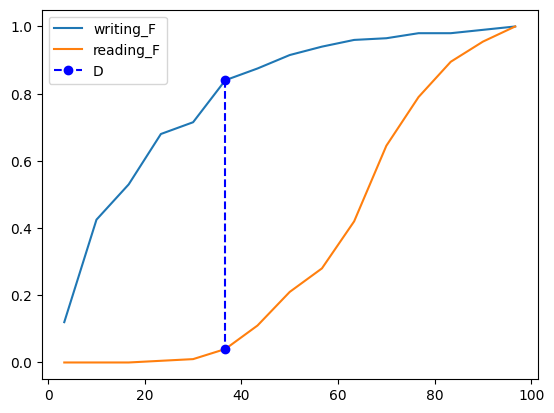

In [98]:
fig, ax = plt.subplots()
ax.plot(writing_F)[0].set_label('writing_F')
ax.plot(reading_F)[0].set_label('reading_F')
x_values = [result['x'], result['x']]
y_values = [writing_F[result['x']], reading_F[result['x']]]
ax.plot(x_values, y_values, 'bo', linestyle="--")[0].set_label('D')
ax.legend()
ax.plot()

Из теста Колмогорова-Смирнова следует, что выборки из разных распредлений

## Проверка на принадлежность reading score к классу равномерных распредлений с помощью критерия Колмогорова

$$ D_{n}= \sup_{-\infty<x<\infty} |F(x) - \hat{F}_{n}(x)| \text{ - статистика Колмогорова}$$
$$ 1 - K(\lambda_{\alpha}) = \alpha $$
$$ H_0 \text{ отвергается } \Leftrightarrow  \sqrt{n}*D_{n} > \lambda_{\alpha} \text {  - Критерий согласия Колмогорова}$$
$$ \text{ Оценим параметры равномерного распредления по методу максимального правдоподобия}:$$
$$ \; \hat{a} = min(X_1,X_2...X_n), \hat{b} = min(X_1,X_2...X_n)$$
$$ \text {Далее будем проверять reading score на согласаие с } U_{\hat{a},\hat{b}} $$

In [111]:
def ks_test(F_X, F_Y, n, alpha=0.05):
    D, x = statitic_k(F_X, F_Y)
    t = kstwobign.ppf(1 - alpha)
    print(sqrt(n)*D, t)
    return {'H0': not sqrt(n)*D >= t, 'statitic': D, 'x': x}

a = min(reading_points)
b = max(reading_points)
# generate uniform distribution with givan a, b
value_F = [(x - a)/(b - a) for x in reading_points]
F = pd.Series(value_F, reading_F.index)

ks_test(F, reading_F, len(reading_F))

1.2338218374346483 1.3580986393225505


{'H0': True, 'statitic': 0.3185714285714285, 'x': 43.333333333333336}

[]

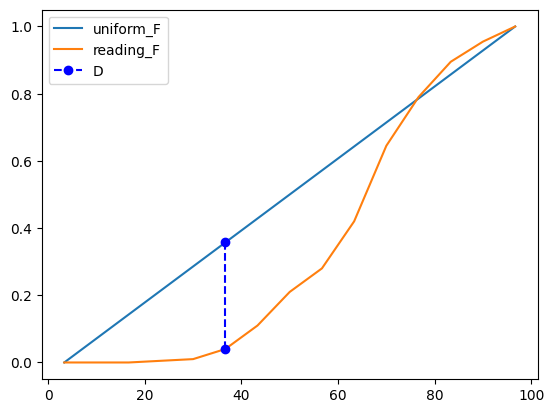

In [110]:
fig, ax = plt.subplots()
ax.plot(F)[0].set_label('uniform_F')
ax.plot(reading_F)[0].set_label('reading_F')
x_values = [result['x'], result['x']]
y_values = [F[result['x']], reading_F[result['x']]]
ax.plot(x_values, y_values, 'bo', linestyle="--")[0].set_label('D')
ax.legend()
ax.plot()

Из теста Колмогорова следует, что reading распределен равномерно.